In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from itertools import combinations
from sklearn.metrics import mean_squared_error

import seaborn as sns



In [3]:
df = pd.read_csv("po2_data.csv")

# Separate explanatory variables (x) from the response variable (y)
# df = df.drop(['subject#', 'test_time'],axis=1)
df = df.drop(['subject#', 'test_time', 'age', 'sex'],axis=1)
# column_relocation = df['total_updrs']
# del df['total_updrs']
# df.insert(loc=18, column='total_updrs', value=column_relocation)
x_1 = df.iloc[:, : -2]
x_2 = df.iloc[:, : -2]
# remove multicollinearity
# x = x.drop(['subject#','shimmer(apq3)', 'shimmer(%)', 'shimmer(apq5)', 'shimmer(apq11)', 'hnr'], axis=1)



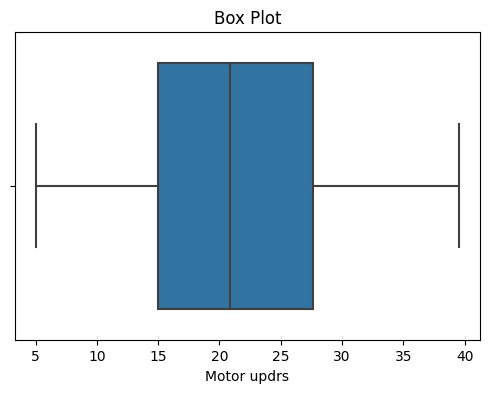

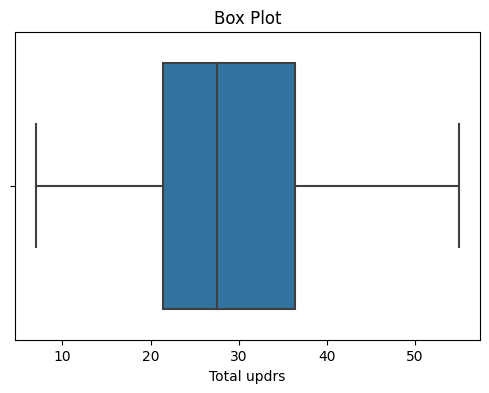

0.2
0.2
Intercept: 61.175919560303
Coefficient: [ 1.31320545e+02 -2.34337224e+04 -5.35209789e+04 -9.01866792e+01
  1.79010886e+04  1.17259655e+02 -5.63961193e+00  1.53432770e+04
 -1.25698091e+02  1.11853008e+02 -5.16770727e+03 -3.75639177e+01
 -5.30425290e-01  3.39977040e+00 -4.06240260e+01  2.32832596e+01]
      jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  jitter(ddp)  \
4061    0.00387     0.000026      0.00136       0.00156      0.00407   
866     0.00743     0.000037      0.00393       0.00396      0.01180   
5601    0.00340     0.000014      0.00141       0.00173      0.00423   
38      0.00251     0.000019      0.00101       0.00129      0.00304   
158     0.00289     0.000019      0.00136       0.00160      0.00408   
...         ...          ...          ...           ...          ...   
4931    0.00299     0.000017      0.00146       0.00145      0.00439   
3264    0.00773     0.000051      0.00327       0.00425      0.00982   
1653    0.00359     0.000027      0.00151  

In [4]:
y_1 = df.iloc[:, -2]
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
sns.boxplot(x=y_1)
plt.title('Box Plot')
plt.xlabel('Motor updrs')
plt.show()
y_2 = df.iloc[:, -1]

plt.figure(figsize=(6, 4))  # Optional: Set the figure size
sns.boxplot(x=y_2)
plt.title('Box Plot')
plt.xlabel('Total updrs')
plt.show()


# Apply cross validation to get the optimal ratio of splitting the dataset
def cross_validation(X, y):
    # Define a range of test set sizes
    test_size_range = [0.1, 0.2, 0.3, 0.4, 0.5]

    # Initialize an empty list to store mean performance scores
    mean_scores = []

    for test_size in test_size_range:
        # Initialize an empty list to store cross-validation scores for each fold
        fold_scores = []

        # Perform k-fold cross-validation for each test set size
        k = 5  # Number of folds
        for _ in range(k):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
            model = LinearRegression()
            model.fit(X_train, y_train)
            scores = model.score(X_test, y_test)  # You can use any appropriate performance metric here
            fold_scores.append(scores)

        # Calculate the mean score for this test set size
        mean_score = np.mean(fold_scores)
        mean_scores.append(mean_score)

    # Choose the best test set size based on the mean performance scores
    best_test_size = test_size_range[np.argmax(mean_scores)]
    print(best_test_size)
        
    return best_test_size


ratio_1 = cross_validation(x_1, y_1)
ratio_2 = cross_validation(x_2, y_2)



def test(x_1, x_2, y_1, y_2, ratio_1=0.4, ratio_2=0.4):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=ratio_1, random_state=0)
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=ratio_2, random_state=0)


    # Build a linear regression model
    model_1 = LinearRegression()

    # Train (fit) the linear regression model using the training data
    model_1.fit(x_train_1, y_train_1)

    # print(f"Intercept: {model_1.intercept_}")
    # print(f"Coefficient: {model_1.coef_}")


    model_2 = LinearRegression()

    # Train (fit) the linear regression model using the training data
    model_2.fit(x_train_2, y_train_2)

    print(f"Intercept: {model_2.intercept_}")
    print(f"Coefficient: {model_2.coef_}")

    # Use linear regression to predict the values of (y) in the test set
    # based on the values of x in the test set
    y_pred_1 = model_1.predict(x_test_1)
    y_pred_2 = model_2.predict(x_test_2)

    # Optional: Show the predicted values of (y) next to the actual values of (y)
    df_pred_1 = pd.DataFrame({"Actual": y_test_1, "Predicted": y_pred_1})
    df_pred_2 = pd.DataFrame({"Actual": y_test_2, "Predicted": y_pred_2})
    print(x_train_2)
    print(df_pred_2)

    # Compute standard performance metrics of the linear regression:

    # Mean Absolute Error
    mae = metrics.mean_absolute_error(y_test_1, y_pred_1)
    # Mean Squared Error
    mse = metrics.mean_squared_error(y_test_1, y_pred_1)
    # Root Mean Square Error
    rmse =  math.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1))
    # Normalised Root Mean Square Error
    y_max = y_test_1.max()
    y_min = y_test_1.min()
    rmse_norm = rmse / (y_max - y_min)
    # R-Squared
    r_2 = metrics.r2_score(y_test_1, y_pred_1)
    
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("RMSE (Normalised): ", rmse_norm)
    print("R_squared: ",r_2)

    
    mae = metrics.mean_absolute_error(y_test_2, y_pred_2)
    # Mean Squared Error
    mse = metrics.mean_squared_error(y_test_2, y_pred_2)
    # Root Mean Square Error
    rmse =  math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2))
    # Normalised Root Mean Square Error
    y_max = y_test_2.max()
    y_min = y_test_2.min()
    rmse_norm = rmse / (y_max - y_min)

    # R-Squared
    r_2 = metrics.r2_score(y_test_2, y_pred_2)

    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("RMSE (Normalised): ", rmse_norm)
    print("R_squared: ",r_2)


test(x_1, x_2, y_1, y_2, ratio_1, ratio_2)

In [5]:
"""
APPLY Z-SCORE STANDARDISATION
"""
scaler = StandardScaler()
# Standisation lower the r squared significantly -> skip

# Drop the previously added constant

# Apply z-score standardisation to all explanatory variables
# std_x_1 = scaler.fit_transform(x_1.values)
# std_x_2 = scaler.fit_transform(x_2.values)

# # Restore the column names of each explanatory variable
# std_x_1_df = pd.DataFrame(std_x_1, index=x_1.index, columns=x_1.columns)
# std_x_2_df = pd.DataFrame(std_x_2, index=x_2.index, columns=x_2.columns)

# ratio_1 = cross_validation(x_1, y_1)
# ratio_2 = cross_validation(x_2, y_2)


# test(std_x_1_df, std_x_2_df, y_1, y_2)
std_x_1_df = x_1
std_x_2_df = x_2

In [6]:
df_1 = pd.concat([std_x_1_df, y_1], axis=1)
df_2 = pd.concat([std_x_2_df, y_2], axis=1)

print(df_1.corr())
print(df_2.corr())

# Log transform

var = ['jitter(%)', 'shimmer(dda)']
for v in var:
# for v in std_x_1_df.columns:
    zero_or_negative_mask = std_x_1_df[v] <= 0
    std_x_1_df.loc[zero_or_negative_mask, v] = 1e-6  # Replace with a small positive value
    std_x_1_df[v + "_log"] = std_x_1_df[v].apply(np.log)
    std_x_1_df = std_x_1_df.drop([v], axis=1)

    zero_or_negative_mask = std_x_2_df[v] <= 0
    std_x_2_df.loc[zero_or_negative_mask, v] = 1e-6  # Replace with a small positive value
    std_x_2_df[v + "_log"] = std_x_2_df[v].apply(np.log)
    std_x_2_df = std_x_2_df.drop([v], axis=1)


ratio_1 = cross_validation(x_1, y_1)
ratio_2 = cross_validation(x_2, y_2)

# print(std_x_df)
test(std_x_1_df, std_x_2_df, y_1, y_2)


                jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  \
jitter(%)        1.000000     0.865489     0.984175      0.968216   
jitter(abs)      0.865489     1.000000     0.844538      0.790464   
jitter(rap)      0.984175     0.844538     1.000000      0.947178   
jitter(ppq5)     0.968216     0.790464     0.947178      1.000000   
jitter(ddp)      0.984178     0.844542     1.000000      0.947185   
shimmer(%)       0.709686     0.648779     0.681623      0.732791   
shimmer(abs)     0.716584     0.655645     0.685423      0.734577   
shimmer(apq3)    0.664005     0.623542     0.650101      0.676712   
shimmer(apq5)    0.693854     0.621184     0.659671      0.733955   
shimmer(apq11)   0.645878     0.589923     0.602968      0.668332   
shimmer(dda)     0.664004     0.623540     0.650099      0.676711   
nhr              0.825212     0.699776     0.792270      0.864824   
hnr             -0.675027    -0.706179    -0.641298     -0.662316   
rpde             0.427174     0.54

C:\Users\Thuan\AppData\Local\Temp\ipykernel_18876\29399927.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_x_1_df.loc[zero_or_negative_mask, v] = 1e-6  # Replace with a small positive value
C:\Users\Thuan\AppData\Local\Temp\ipykernel_18876\29399927.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_x_1_df[v + "_log"] = std_x_1_df[v].apply(np.log)
C:\Users\Thuan\AppData\Local\Temp\ipykernel_18876\29399927.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

0.2
0.2
Intercept: 78.22181903641193
Coefficient: [-3.46872264e+04 -3.70972088e+04 -1.28369909e+01  1.24023103e+04
  1.39620917e+02 -1.03161788e+01 -1.00939061e+02 -1.66085470e+02
  1.64135176e+02 -3.37295846e+01 -4.40314471e-01  1.88724175e+00
 -4.32929566e+01  1.87035636e+01  3.44820234e+00 -9.47858059e-01]
      jitter(abs)  jitter(rap)  jitter(ppq5)  jitter(ddp)  shimmer(%)  \
663      0.000028      0.00463       0.00407      0.01389     0.09150   
4855     0.000014      0.00097       0.00068      0.00291     0.01131   
5503     0.000038      0.00419       0.00446      0.01257     0.03156   
482      0.000018      0.00094       0.00141      0.00281     0.01518   
3840     0.000022      0.00158       0.00190      0.00473     0.02034   
...           ...          ...           ...          ...         ...   
4931     0.000017      0.00146       0.00145      0.00439     0.01357   
3264     0.000051      0.00327       0.00425      0.00982     0.02951   
1653     0.000027      0.00151  

In [7]:
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x_1 = scaler.fit_transform(std_x_1_df.values)

# Restore column names of explanatory variables
std_x_1_df = pd.DataFrame(std_x_1, index=std_x_1_df.index, columns=std_x_1_df.columns)
std_x_2 = scaler.fit_transform(std_x_2_df.values)

# Restore column names of explanatory variables
std_x_2_df = pd.DataFrame(std_x_2, index=std_x_2_df.index, columns=std_x_2_df.columns)


ratio_1 = cross_validation(x_1, y_1)
ratio_2 = cross_validation(x_2, y_2)

test(std_x_1_df, std_x_2_df, y_1, y_2)

0.2
0.2
Intercept: 28.984741260708944
Coefficient: [-2.10519882e-01 -1.78052132e+02 -6.76346561e-01  1.78751678e+02
  1.03085798e+00  9.15430370e-01  7.55572976e+00 -5.67719921e+00
  5.38379711e+00 -2.84220919e+00 -2.27692086e+00  1.23264271e-01
 -3.29904968e+00  1.47479934e+00  2.02494094e+00 -8.92789240e+00]
      jitter(abs)  jitter(rap)  jitter(ppq5)  jitter(ddp)  shimmer(%)  \
663     -0.421285     1.295855      0.942059     1.295299    2.000995   
4855    -1.388413    -1.496341     -2.151139    -1.499599   -1.605476   
5503     0.114276     1.116134      1.127343     1.116315    0.221805   
482     -1.090604    -1.537013     -1.177512    -1.545083   -1.161112   
3840    -0.812723    -0.755111     -0.640705    -0.758578   -0.646933   
...           ...          ...           ...          ...         ...   
4931    -1.166925    -0.888769     -1.130463    -0.885271   -1.339406   
3264     0.611180     0.638772      1.030447     0.642271    0.084878   
1653    -0.508550    -0.832399 

In [8]:
# applying the forward stepwise selection, and the r square increase is neglecting 
def forward_stepwise_selection(X, y, ratio):
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=ratio, random_state=0)

    selected_features = []
    best_error = np.inf  # Initialize with a large value

    while len(selected_features) < len(X.columns):
        remaining_features = [feature for feature in X.columns if feature not in selected_features]
        errors = []
        
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_train_current = X_train_1[current_features]
            X_test_current = X_test_1[current_features]
            
            # Fit a model using statsmodels
            model = sm.OLS(y_train_1, sm.add_constant(X_train_current)).fit()
            
            # Make predictions and calculate error
            y_pred = model.predict(sm.add_constant(X_test_current))
            error = mean_squared_error(y_test_1, y_pred)
            errors.append((feature, error))
        
        # Find the feature that results in the lowest error
        best_feature, best_error_for_feature = min(errors, key=lambda x: x[1])
        
        # If the new feature improves the model, add it to the selected features
        if best_error_for_feature < best_error:
            selected_features.append(best_feature)
            best_error = best_error_for_feature
        else:
            break  # If no improvement, break the loop

    return selected_features

ratio_1 = cross_validation(std_x_1_df, y_1)
ratio_2 = cross_validation(std_x_2_df, y_2)

selected_features_1 = forward_stepwise_selection(std_x_1_df, y_1, ratio_1)
selected_features_2 = forward_stepwise_selection(std_x_2_df, y_2, ratio_2)


keep_1 = selected_features_1
keep_2 = selected_features_2
print(keep_1)
print(keep_2)
std_x_1_df = std_x_1_df[[x for x in keep_1]]
std_x_2_df = std_x_2_df[[x for x in keep_2]]

ratio_1 = cross_validation(std_x_1_df, y_1)
ratio_2 = cross_validation(std_x_2_df, y_2)


test(std_x_1_df, std_x_2_df, y_1, y_2, ratio_1, ratio_2)
# def best_subset_selection(X, y, model):
#     best_subset = []
#     best_score = float('inf')
    
#     for k in range(1, len(X.columns) + 1):
#         for subset in combinations(X.columns, k):
#             X_subset = X[list(subset)]
            
#             X_train, X_val, y_train, y_val = train_test_split(X_subset, y, test_size=0.4    , random_state=42)
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_val)
#             mse = mean_squared_error(y_val, y_pred)
            
#             if mse < best_score:
#                 best_score = mse
#                 best_subset = list(subset)
    
#     return best_subset

# best_model = None
# best_subset = None
# best_error = np.inf
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(std_x_1_df, y_1, test_size=ratio_1, random_state=0)
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(std_x_2_df, y_2, test_size=ratio_2, random_state=0)

# model = LinearRegression()
# best_features_1 = best_subset_selection(X_train_1, y_train_1, model)
# best_features_2 = best_subset_selection(X_train_2, y_train_2, model)



0.2
0.2
['hnr', 'dfa', 'shimmer(dda)_log', 'shimmer(apq11)', 'shimmer(apq5)', 'shimmer(apq3)', 'jitter(abs)', 'jitter(ppq5)', 'nhr', 'rpde', 'jitter(%)_log', 'jitter(rap)', 'jitter(ddp)']
['hnr', 'dfa', 'rpde', 'nhr', 'jitter(%)_log', 'shimmer(dda)_log', 'shimmer(apq11)', 'jitter(abs)', 'shimmer(apq3)', 'shimmer(apq5)', 'jitter(ppq5)', 'jitter(rap)', 'jitter(ddp)']
0.2
0.2
Intercept: 28.942113913636835
Coefficient: [  -2.35879948   -3.14392462    0.31151842   -2.61472365    3.15098197
   -8.84882754    6.52763194   -0.7664756     8.48734931   -6.08445839
    0.85574677 -173.53133722  173.11664103]
           hnr       dfa      rpde       nhr  jitter(%)_log  shimmer(dda)_log  \
4061  0.506541 -0.763347 -0.688331 -0.154207      -0.458100          0.288916   
866  -0.058358  0.321104  1.038801  0.579060       0.771926         -0.446913   
5601 -0.948003 -0.652442  0.359856  0.094488      -0.738166          0.239874   
38    1.497830 -0.908913 -1.537548 -1.519598      -1.444622         -1.

In [9]:
# keep_1 = best_features_1
# keep_1 = ['jitter(abs)', 'jitter(rap)', 'jitter(ppq5)', 'jitter(ddp)', 'shimmer(%)', 'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe', 'shimmer(dda)_log']

# keep_2 = ['jitter(rap)', 'jitter(ppq5)', 'jitter(ddp)', 'shimmer(%)', 'shimmer(apq5)', 'shimmer(apq11)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe', 'shimmer(dda)_log']

keep_1 = selected_features_1
keep_2 = selected_features_2

# keep_2 = best_features_2

print(keep_1)
print(keep_2)
# keep = ['age', 'test_time', 'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ddp)', 'shimmer(%)', 'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'dfa']
# ['age', 'sex', 'test_time', 'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ddp)', 'shimmer(%)', 'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'dfa']
std_x_1_df = std_x_1_df[[x for x in keep_1]]
std_x_2_df = std_x_2_df[[x for x in keep_2]]

ratio_1 = cross_validation(std_x_1_df, y_1)
ratio_2 = cross_validation(std_x_2_df, y_2)


test(std_x_1_df, std_x_2_df, y_1, y_2, ratio_1, ratio_2)

['hnr', 'dfa', 'shimmer(dda)_log', 'shimmer(apq11)', 'shimmer(apq5)', 'shimmer(apq3)', 'jitter(abs)', 'jitter(ppq5)', 'nhr', 'rpde', 'jitter(%)_log', 'jitter(rap)', 'jitter(ddp)']
['hnr', 'dfa', 'rpde', 'nhr', 'jitter(%)_log', 'shimmer(dda)_log', 'shimmer(apq11)', 'jitter(abs)', 'shimmer(apq3)', 'shimmer(apq5)', 'jitter(ppq5)', 'jitter(rap)', 'jitter(ddp)']
0.2
0.2
Intercept: 28.942113913636835
Coefficient: [  -2.35879948   -3.14392462    0.31151842   -2.61472365    3.15098197
   -8.84882754    6.52763194   -0.7664756     8.48734931   -6.08445839
    0.85574677 -173.53133722  173.11664103]
           hnr       dfa      rpde       nhr  jitter(%)_log  shimmer(dda)_log  \
4061  0.506541 -0.763347 -0.688331 -0.154207      -0.458100          0.288916   
866  -0.058358  0.321104  1.038801  0.579060       0.771926         -0.446913   
5601 -0.948003 -0.652442  0.359856  0.094488      -0.738166          0.239874   
38    1.497830 -0.908913 -1.537548 -1.519598      -1.444622         -1.297156  

In [10]:
# print the p-value to delete variables with p-values higher than 0.05
std_x_1_df = sm.add_constant(std_x_1_df)
model_1 = sm.OLS(y_1,std_x_1_df).fit()
pred = model_1.predict(std_x_1_df)
model_details_1 = model_1.summary()
print(model_details_1)

std_x_2_df = sm.add_constant(std_x_2_df)
model_2 = sm.OLS(y_2,std_x_2_df).fit()
pred = model_2.predict(std_x_2_df)
model_details_2 = model_2.summary()
print(model_details_2)



                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     71.92
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          3.53e-177
Time:                        10:36:41   Log-Likelihood:                -20173.
No. Observations:                5863   AIC:                         4.037e+04
Df Residuals:                    5849   BIC:                         4.047e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               21.2897      0.099  

In [11]:
# After removing high-p value, the r squared increased
std_x_1_df = std_x_1_df.drop(['shimmer(apq3)', 'jitter(rap)'], axis=1)
std_x_2_df = std_x_2_df.drop(['shimmer(dda)_log', 'jitter(ddp)', 'jitter(%)_log'], axis=1)

ratio_1 = cross_validation(std_x_1_df, y_1)
ratio_2 = cross_validation(std_x_2_df, y_2)


test(std_x_1_df, std_x_2_df, y_1, y_2, ratio_1, ratio_2)

0.2
0.2
Intercept: 28.938586004044158
Coefficient: [ 0.         -2.40810713 -2.9658484   0.23198569 -2.10679116  6.90055342
  0.08425356 -0.04207352 -6.61041816  1.29281947  0.77899632]
      const       hnr       dfa      rpde       nhr  shimmer(apq11)  \
4061    1.0  0.506541 -0.763347 -0.688331 -0.154207        0.749319   
866     1.0 -0.058358  0.321104  1.038801  0.579060       -0.131722   
5601    1.0 -0.948003 -0.652442  0.359856  0.094488       -0.206421   
38      1.0  1.497830 -0.908913 -1.537548 -1.519598       -1.055202   
158     1.0  0.804485 -1.487412 -0.647861 -1.353184       -0.418527   
...     ...       ...       ...       ...       ...             ...   
4931    1.0  0.913594  0.119052 -1.473337 -1.391244       -1.285147   
3264    1.0 -0.887912  1.266274 -0.055043 -0.007223        0.284363   
1653    1.0  0.681701 -1.239601  0.195674 -0.606362       -0.607428   
2607    1.0  0.494799 -0.146688 -0.919256 -0.453132        1.398257   
2732    1.0  0.180126  1.146789 -

In [12]:
# feature engineering
std_x_1_df['doshn'] = std_x_1_df['hnr']**2 - std_x_1_df['nhr']
std_x_2_df['doshn'] = std_x_2_df['hnr']**2 - std_x_2_df['nhr']
std_x_1_df['dshn'] = std_x_1_df['hnr']**2 / std_x_1_df['nhr']
std_x_2_df['dshn'] = std_x_2_df['hnr']**2 / std_x_2_df['nhr']


ratio_1 = cross_validation(std_x_1_df, y_1)
ratio_2 = cross_validation(std_x_2_df, y_2)
test(std_x_1_df, std_x_2_df, y_1, y_2, ratio_1, ratio_2)

0.1
0.2
Intercept: 29.87505238430674
Coefficient: [ 0.00000000e+00 -1.61261331e+00 -3.13788330e+00  2.66356078e-01
 -2.29159867e+00  6.57622494e+00 -1.61158383e-01 -6.68903015e-01
 -5.33505931e+00  1.76640319e+00  4.52018916e-01 -9.24438128e-01
 -2.60589291e-05]
      const       hnr       dfa      rpde       nhr  shimmer(apq11)  \
4061    1.0  0.506541 -0.763347 -0.688331 -0.154207        0.749319   
866     1.0 -0.058358  0.321104  1.038801  0.579060       -0.131722   
5601    1.0 -0.948003 -0.652442  0.359856  0.094488       -0.206421   
38      1.0  1.497830 -0.908913 -1.537548 -1.519598       -1.055202   
158     1.0  0.804485 -1.487412 -0.647861 -1.353184       -0.418527   
...     ...       ...       ...       ...       ...             ...   
4931    1.0  0.913594  0.119052 -1.473337 -1.391244       -1.285147   
3264    1.0 -0.887912  1.266274 -0.055043 -0.007223        0.284363   
1653    1.0  0.681701 -1.239601  0.195674 -0.606362       -0.607428   
2607    1.0  0.494799 -0.14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             5863 non-null   float64
 1   hnr               5863 non-null   float64
 2   dfa               5863 non-null   float64
 3   shimmer(dda)_log  5863 non-null   float64
 4   shimmer(apq11)    5863 non-null   float64
 5   shimmer(apq5)     5863 non-null   float64
 6   jitter(abs)       5863 non-null   float64
 7   jitter(ppq5)      5863 non-null   float64
 8   nhr               5863 non-null   float64
 9   rpde              5863 non-null   float64
 10  jitter(%)_log     5863 non-null   float64
 11  jitter(ddp)       5863 non-null   float64
 12  doshn             5863 non-null   float64
 13  dshn              5863 non-null   float64
dtypes: float64(14)
memory usage: 641.4 KB
None
